# Анализ рынка москвы


### Цели и задачи проекта

- Помочь коллегам из фонда Shut Up and Take My Money изучить рынок Москвы. 
- Изучить датасеты: заведения общественного питания и средний чек в заведениях общественного питания.
- Провести предобработку данных.
- Провести исследовательский анализ данных:
    - изучить данные более детально;
-  Сформулировать выводы по проведённому анализу.

### Описание данных

Датасет, содержащий информацию о заведениях общественного питания:
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;
1 — заведение является сетевым.
- seats — количество посадочных мест.

Датасет, содержащий информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

- Загрузка данных и знакомство с ними.
- Предобработка данных.
- Исследовательский анализ данных.
- Итоговые выводы и рекомендации.

## 1. Загрузка данных и знакомство с ними

- Загрузим необходимые библиотеки и сами датасеты.


In [328]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [ ]:
places = pd.read_csv('')
avg_cheque = pd.read_csv('')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [330]:
places.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [331]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду.
- **Числовые значения с плавающей запятой (float64).** Два столбеца, `rating`, содержит информацию о рейтинге, корректный тип так как общий рейтинг может иметь не целочисленное значение.`seats`, содержит информацию о количестве посадочных мест, неправильный тип данных, стоит преобразовать  в `int64`, скорее всего некорректный тип из-за пропусков в столбце.
- **Строковые данные (object).** Шесть столбцов имеют тип данных `object`:
    - `name`, `address` содержат строковую информацию, что логично для текстовых данных. Здесь тип данных `object` подходит.
    - `id` хранят информацию об индикаторе. Для таких данных рекомендуется использовать тип `int64`.
    - `category`, `district` также хранят текстовые данные, но их можно рассматривать как категориальные признаки. В этом случае можно использовать тип `category`, чтобы улучшить производительность и оптимизировать память, если набор значений ограничен и заведомо известен.
    - `hours` хранит информацию о днях и часах работы, корректный тип, так как содержание ячейки включает в себя и буквенные и числовые символы
- Пропуски содержатся только в столбцах `hours`, `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [332]:
avg_cheque.head(15)

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN
5,96ebceb1a09e4e3191133b9fe0379a64,средние,Средний счёт:199 ₽,199.0,NaN
6,0243288b78024af090b8e947842c969c,средние,Средний счёт:200–300 ₽,250.0,NaN
7,36aeb0ffa69c48fdb0021549520deb10,средние,Средний счёт:от 500 ₽,500.0,NaN
8,487167877eb04288bc90d4fa80646fc2,средние,Средний счёт:1000–1200 ₽,1100.0,NaN
9,ac32978af97641bfacf996e7f5a50ee5,средние,Цена бокала пива:250–350 ₽,NaN,NaN


In [333]:
avg_cheque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду, тем самым оба датасета приведены к snake case.
- **Числовые значения с плавающей запятой (float64).** Два столбеца, `middle_avg_bill`, содержит информацию о среднем чеке, на первый взгляд можно предположить, что стоит заменить тип на `int64`, однако значения берутся из столбца `avg_bill`, которые необходимо исследовать, не указано ли значение средней стоимости в диапазоне с копейками . Для столбца `middle_coffee_cup`, аналогичная ситуация
- **Строковые данные (object).** Шесть столбцов имеют тип данных `object`:
    - `id` хранят информацию об индикаторе. Для таких данных рекомендуется использовать тип `int64`.
    - `price`, хранят текстовые данные, но их можно рассматривать как категориальные признаки. В этом случае можно использовать тип `category`, чтобы улучшить производительность и оптимизировать память, если набор значений ограничен и заведомо известен.
    -`avg_bill` хранит информацию о средней стоимости заказа в диапазоне, корректный тип, так как содержание ячейки включает в себя и буквенные и числовые символы
- Пропуски содержатся практически во всех столбцах столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один, с которым мы и продолжим работу. Нам важны все данные из датасета places, потому что там основная информация о заведениях

In [334]:
df = places.merge(avg_cheque, on='id', how='left')

Выведем информацию о датасете

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Данные соединены, и информация обо всех заведениях сохранилась.

## 2. Предобработка данных

Подготовим данные к исследовательскому анализу:

Ранее была изучена корректность типов данных. Было принято решение оставить  все типы данных, как есть

- Изучить пропущенные значения в данных

Посчитаем количество пропусков в каждом столбце в абсолютных значениях

In [336]:
df.isnull().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
district                0
category                0
name                    0
id                      0
address                 0
chain                   0
rating                  0
dtype: int64

Посчитаем количество пропусков в каждом столбце в относительных значениях.

In [337]:
df.isnull().sum().sort_values(ascending=False)/len(df) * 100

middle_coffee_cup    93.635498
middle_avg_bill      62.538663
price                60.563883
avg_bill             54.603854
seats                42.957411
hours                 6.376398
district              0.000000
category              0.000000
name                  0.000000
id                    0.000000
address               0.000000
chain                 0.000000
rating                0.000000
dtype: float64

Про пропуски в столбцах `middle_avg_bill`, `middle_coffee_cup` можно сказать, что данные отсудствуют из-за того, что берутся из столбца `avg_bill`, из которого можно вычленить данные либо для одного, либо для другого столбца. 
Много пропусков встречаются в столбце `seats`, пропусков практически 43%. Можно  выдвинуть гипотезу: эти заведения скорее всего представляют собой не место, в котором можно отдохнуть и посидеть, а палатку, в которой можно быстро оплатить и получить свой заказ, например кофейни, они предназначены, чтоб есть либо на бегу, либо взять с собой. Много пропусков также содержится в столбце `price`, примерно 61%, можно выдвинуть гипотезу, что заведение либо недавно открылось, либо люди редко туда заходят, тем самым тяжело выделить определенную категорию.


В столбце `price` заменими пропуски на "Неизвестно"

In [338]:
df['price'] = df['price'].fillna('неизвестно')


В столбце hours примерно 6%  пропусков, но он нам понадобиться для дальнейшего анализа, поэтому не будем его трогать.

Для остальных данных оставим пропуски, так как они зависимы длуг от друга. Проверим, что преобразования применились

In [339]:
df.isnull().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                   0
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

- Проверим данные на явные и неявные дубликаты.

В столбцах могут быть дубликаты из-за разного регистра букв. Попробуем привести все значения колонок name к нижнему регистру.

In [340]:
df['name'] = df['name'].str.lower()

Выведем все уникальные значения столбцов, в которых могли бы встречаться дубликаты

In [341]:
print(f'category: {df['category'].unique()}\n')
print(f'district: {df['district'].unique()}\n')
print(f'price: {df['price'].unique()}\n')


category: ['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']

district: ['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']

price: ['неизвестно' 'выше среднего' 'средние' 'высокие' 'низкие']



Все значения разные.
Посмотрим, сколько в дублирующих строчек

In [342]:
drop = df.duplicated().sum()
drop

np.int64(0)

Посмотрим, сколько в датасете дубликатов по имени и адресу

In [343]:
duplicates = df[df.duplicated(subset=['name', 'address'])]
duplicates

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,неизвестно,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,неизвестно,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,неизвестно,NaN,NaN,NaN


Удалим дубликаты.

In [344]:
df = df.drop_duplicates(subset=['name','address'])

- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [345]:
def categorize(row):
    if row['hours'] == 'ежедневно, круглосуточно':
        return "True"
    else:
        return "False"

df['is_24_7'] = df.apply(categorize, axis=1)
df

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,неизвестно,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,неизвестно,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,неизвестно,NaN,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,неизвестно,NaN,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,неизвестно,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,неизвестно,NaN,NaN,NaN,True


---

### Промежуточный вывод


- В значениях были однаружены и обработаны пропуски.
- Данные были приведены к корректному типу.
- Был приведен поиск дубликатов, дубликаты были удалены.
- Размер датасета остался таким же.
- был добавлен новый столбец `is_24_7`, с обозначением того, что заведение работает ежедневно и круглосуточно или нет.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используем визуализации. Проверим, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставим небольшой комментарий с выводом или обсуждением результата. В конце шага обобщим результаты, выделив самое важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по каждой категории. Результат сопроводим подходящей визуализацией.

Разберем, какие бывают категории

In [346]:
print(f'category: {df['category'].unique()}')

category: ['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']


Всего 8 категорий. Посмотрим количество заведений по каждой категории.

In [347]:
print('Распределение данных по значениям столбца category:')
df['category'].value_counts()

Распределение данных по значениям столбца category:


category
кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

Рассмотрим распределение данных в процентах

In [348]:
print('Распределение данных по значениям столбца category в пройентах:')
df['category'].value_counts(normalize=True)

Распределение данных по значениям столбца category в пройентах:


category
кафе               0.282875
ресторан           0.243008
кофейня            0.168154
бар,паб            0.090920
пиццерия           0.075330
быстрое питание    0.071760
столовая           0.037487
булочная           0.030465
Name: proportion, dtype: float64

Можно заметить, что меньше всего булочных и столовых. В Москве в основном предпочитают открывать кафе, так же достаточно много ресторанов и общее количество заведений в этих категориях представлено давольно близкими значениями. Также много кофеен, хотя их и сильно мненьше, в отличии от лидеров. А вот количество остальных заведений сильно меньше. Это значит, что количество заведений распределены неравномерно между категориями, и это накладывает свои ограничения на сравнение групп между собой.

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `category`:

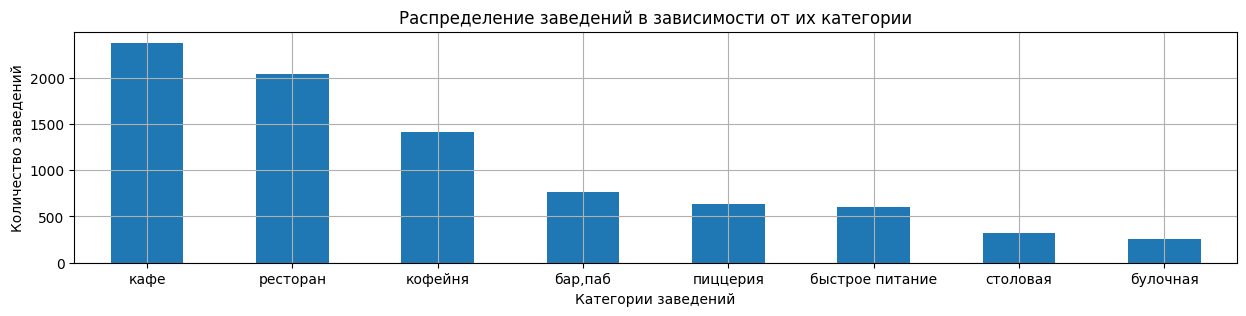

In [349]:
plt.figure(figsize=(15, 3))

df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от их категории'
)

plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')
plt.grid()

plt.show()

Из категорий две значительно преобладают, кофеен тоже много — теперь это хорошо видно.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводим подходящими визуализациями.

Разберем, какие бывают районы.

In [350]:
print(f'district: {df['district'].unique()}')

district: ['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


Всего 9 районов. Посмотрим количество заведений по каждому району.

In [351]:
print('Распределение данных по значениям столбца district:')
df['district'].value_counts()

Распределение данных по значениям столбца district:


district
Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: count, dtype: int64

In [352]:
print('Распределение данных по значениям столбца district в процентах:')
df['district'].value_counts(normalize=True)

Распределение данных по значениям столбца district в процентах:


district
Центральный административный округ         0.266809
Северный административный округ            0.106986
Южный административный округ               0.106153
Северо-Восточный административный округ    0.105915
Западный административный округ            0.101154
Восточный административный округ           0.094966
Юго-Восточный административный округ       0.084970
Юго-Западный административный округ        0.084375
Северо-Западный административный округ     0.048673
Name: proportion, dtype: float64

Можно заметить, что меньше всего заведений в Северо-западном административном округе, а больше всего в Центральном административном округе. Однако все остальные округи имеют примерно одинаковое количество. Это снова говорит о  неравномерном распределении. 

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `district`:

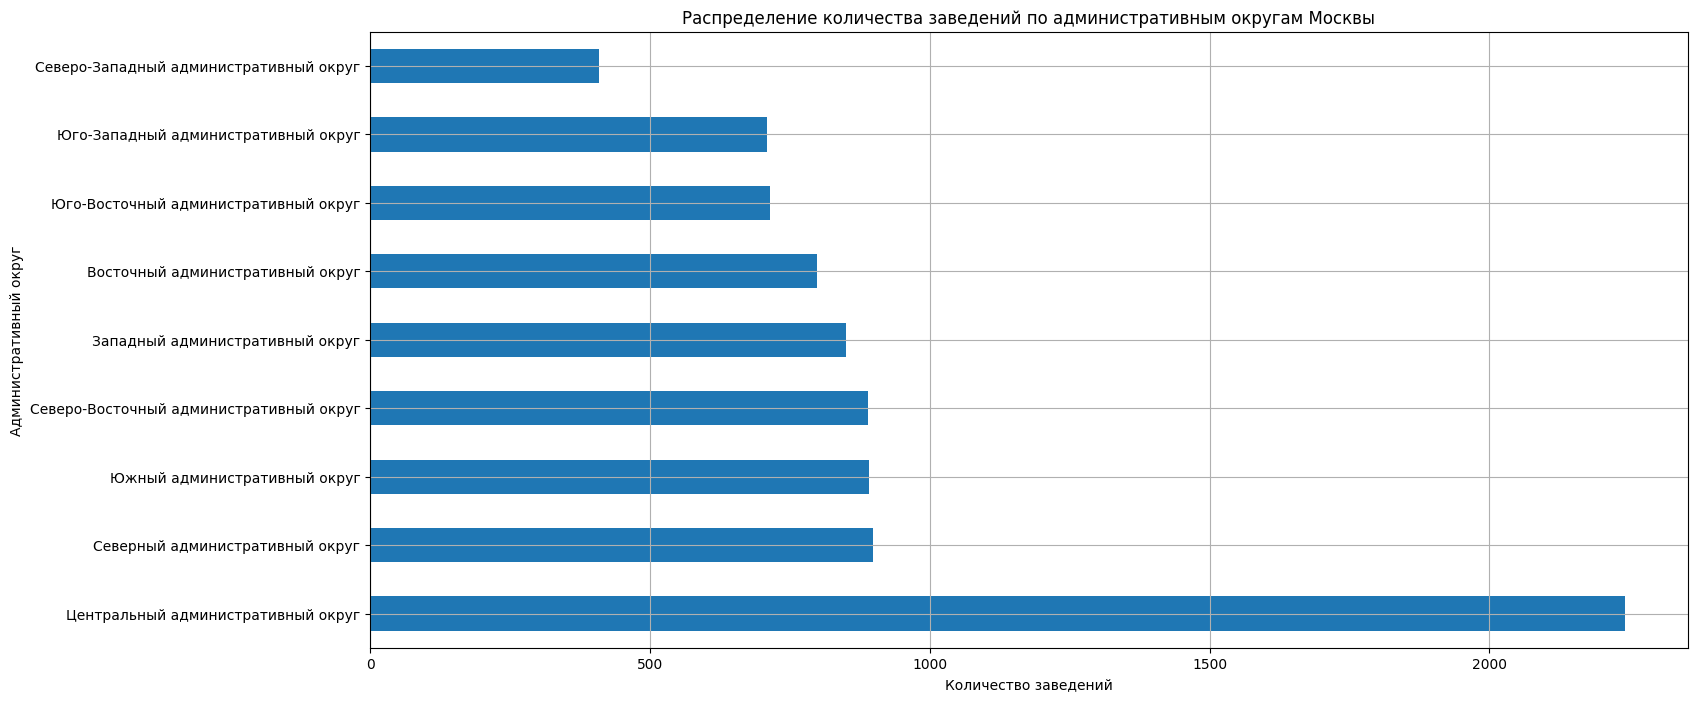

In [353]:
plt.figure(figsize=(17, 8))

df['district'].value_counts().plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot= 0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заведений по административным округам Москвы'
)

plt.ylabel('Административный округ')
plt.xlabel('Количество заведений')
plt.grid()

plt.show()

Больше всего заведений открываются в Центральном административном округе — теперь это хорошо видно. Исследуем его поглубже. Выедем количесство каждой категории заведений по ЦАО

In [354]:
print('Распределение данных по значениям столбца category по ЦАО:')
df[df['district'] == 'Центральный административный округ']['category'].value_counts()

Распределение данных по значениям столбца category по ЦАО:


category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

In [355]:
print('Распределение данных по значениям столбца category по ЦАО в процентах:')
df[df['district'] == 'Центральный административный округ']['category'].value_counts(normalize=True)

Распределение данных по значениям столбца category по ЦАО в процентах:


category
ресторан           0.298840
кафе               0.206958
кофейня            0.190901
бар,паб            0.162355
пиццерия           0.050401
быстрое питание    0.038805
столовая           0.029438
булочная           0.022302
Name: proportion, dtype: float64

Можно заметить, что снова меньше всего булочных и столовых, а больше всего снова ресторанов,кафе и кофеен, но также много и баров, пабов, что отличается, от первоначалбного исследования категорий. 

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `category` только по ЦАО:

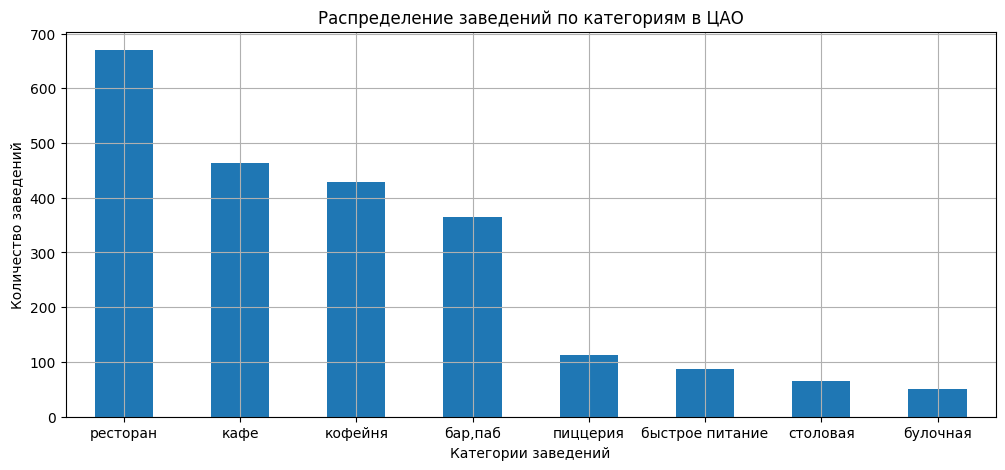

In [356]:
central_df = df[df['district'] == 'Центральный административный округ']

plt.figure(figsize=(12, 5))

central_df['category'].value_counts().plot(
    kind='bar',                  
    rot=0,                       
    legend=False,
    title='Распределение заведений по категориям в ЦАО',
)

plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')
plt.grid() 

plt.show()


Можно выдвинуть гипотезу, что в центр Мосвы в основной массе люди приходят либо за роскошью, либо за развлечениями. Так же в центре много офисов, поэтому кажется логичным открытие большого количества кофеен, чтоб взбодриться по утрам.

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуем данные, ответим на вопросы и построим необходимые визуализации.

Проверяем распределение данных по значениям в столбце chain.


In [357]:
print('Распределение данных по значениям столбца chain:')
print(df['chain'].value_counts())

Распределение данных по значениям столбца chain:
chain
0    5200
1    3203
Name: count, dtype: int64


In [358]:
print('Распределение данных по значениям столбца chain в процентах:')
print(df['chain'].value_counts(normalize=True))

Распределение данных по значениям столбца chain в процентах:
chain
0    0.618827
1    0.381173
Name: proportion, dtype: float64


Визуализируем данные

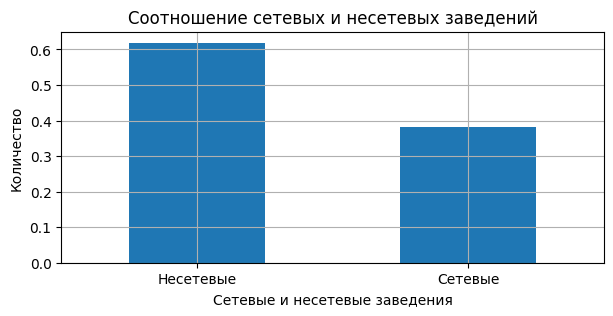

In [359]:
plt.figure(figsize=(7, 3))

df['chain'].value_counts(normalize=True).plot(
               kind='bar', 
               rot=0, 
               legend=False, 
               title=f'Соотношение сетевых и несетевых заведений'
)

plt.xticks([0, 1], ['Несетевые', 'Сетевые'])
plt.xlabel('Сетевые и несетевые заведения')
plt.ylabel('Количество')
plt.grid()

plt.show()

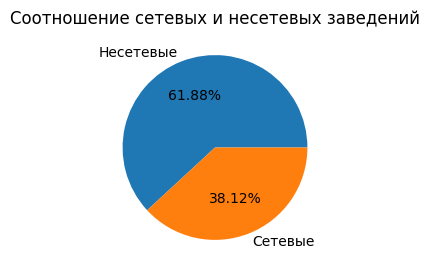

In [360]:
chain_count = df['chain'].value_counts(normalize=True)
plt.figure(figsize=(7, 3))
plt.pie(chain_count, labels=['Несетевые', 'Сетевые'], autopct='%1.2f%%')
plt.title('Соотношение сетевых и несетевых заведений')
plt.show()

Только 38% заведений сетевые.

Изучим, существует ли зависимость между категорией заведения и является ли оно сетевым. Для этого построим столбчатые диаграммы с разделением по признаку `chain` среди разных категорий, найдем, где больше сетевых заведений:

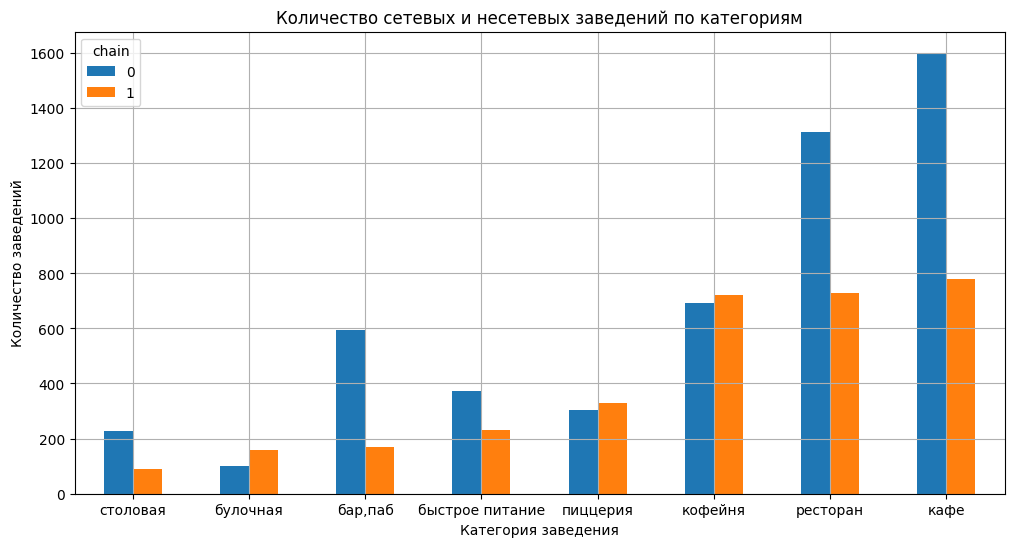

In [361]:
grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0).sort_values(1)
grouped.plot(kind='bar',
               title=f'Количество сетевых и несетевых заведений по категориям',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория заведения',
               rot=0,
               figsize=(12, 6))
plt.grid()

plt.show()

Больше всего сетевых заведений таких как кофейни и пиццерии.

---

### Задача 4

Исследуем количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводим подходящими визуализациями.


Изучим статистические показатели столбца seats

In [362]:
print('Статистические показатели столбца seats:')
df['seats'].describe()

Статистические показатели столбца seats:


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Можно предположить, что распределение количества посадочных мест не идеально симметрично, но приближено к нормальному — среднее (108.4) и медианное (75) значения находятся достаточно близко. Однако стандартное отклонение (122.8) довольно велико по сравнению со средним, что указывает на широкий разброс значений. Это подтверждается разницей между минимальным (0) и максимальным (1288) количеством мест — в данных, вероятно, присутствуют выбросы или аномальные заведения с очень большим числом посадочных мест.

Найдем самое частое количество посадочных мест (моду) для каждой категории заведений.

In [363]:
grouped_seats = df.groupby('category', as_index=True).agg(
    seats=('seats', lambda x: x.mode().iat[0] if not x.mode().empty else None)
)
print(grouped_seats)

                 seats
category              
бар,паб           60.0
булочная           0.0
быстрое питание    0.0
кафе              40.0
кофейня          100.0
пиццерия          40.0
ресторан         100.0
столовая          40.0


Больше всего мест в кофейнях и ресторан - 100 мест. Довольно странные значение для кофеин. Странно, что в булочных и быстрого питания - 0. Но скорее всего люди просто берут еду с собой и  едят либо в офисе, либо по дороге куда-то, поэтому нет смысла ставить столики.
Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с количеством мест.

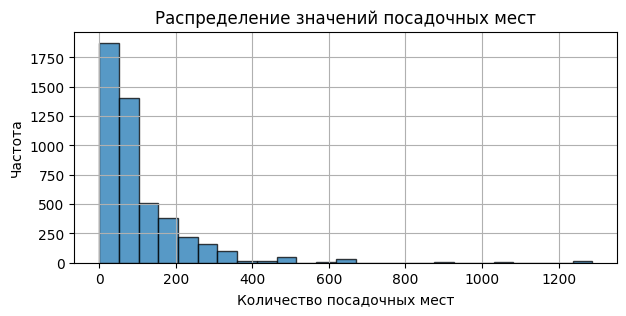

In [364]:
plt.figure(figsize=(7, 3))

df['seats'].plot(
                kind='hist',
                bins=25,
                alpha=0.75,
                edgecolor='black',
                rot=0, 
)

plt.title('Распределение значений посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.grid()

plt.show()

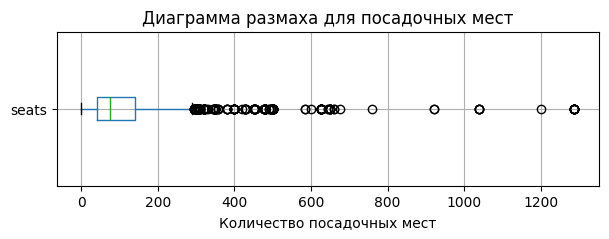

In [365]:
plt.figure(figsize=(7, 2))

df.boxplot(column='seats', vert=False)

plt.title('Диаграмма размаха для посадочных мест')
plt.xlabel('Количество посадочных мест')

plt.show()

Посмотрим на строки с аномальными значениями

In [366]:
df.sort_values(by = 'seats', ascending=False).head(15)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
6524,c93d20f53072495c9cf2e489914cb8a5,ян примус,ресторан,"Москва, проспект Вернадского, 121, корп. 1",Западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,1,1288.0,выше среднего,Средний счёт:1500 ₽,1500.0,NaN,False
6574,5925d9677fe24778a27e35ccd88c0a2d,мюнгер,пиццерия,"Москва, проспект Вернадского, 97, корп. 1",Западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,1,1288.0,неизвестно,NaN,NaN,NaN,False
6518,fbf22d98b62a47fbb2a71be3545f16b2,delonixcafe,ресторан,"Москва, проспект Вернадского, 94, корп. 1",Западный административный округ,"ежедневно, круглосуточно",4.1,0,1288.0,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,True
6684,6287fb9811434558a4ada0ae08be9c04,пивной ресторан,"бар,паб","Москва, проспект Вернадского, 121, корп. 1",Западный административный округ,NaN,4.5,0,1288.0,неизвестно,NaN,NaN,NaN,False
6690,f9e4ec2d1e5946cf83c9564b2d06acd6,японская кухня,ресторан,"Москва, проспект Вернадского, 121, корп. 1",Западный административный округ,NaN,4.4,1,1288.0,неизвестно,NaN,NaN,NaN,False
6641,0508ba663a4c42d1b5068e51afcc26ef,one price coffee,кофейня,"Москва, проспект Вернадского, 84, стр. 1",Западный административный округ,"ежедневно, 08:30–20:00",4.3,1,1288.0,неизвестно,NaN,NaN,NaN,False
6658,19a223ff04f74af7a12bd87b77ce468b,гудбар,"бар,паб","Москва, проспект Вернадского, 97, корп. 1",Западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",4.1,0,1288.0,средние,Средний счёт:700 ₽,700.0,NaN,False
6771,6f85ea6419c941208f7deee9194383e1,точка,кафе,"Москва, проспект Вернадского, 84, стр. 1",Западный административный округ,NaN,4.7,1,1288.0,неизвестно,NaN,NaN,NaN,False
6807,ba5a32dfee6c4661a25c0ea2d39f393d,loft-cafe академия,кафе,"Москва, проспект Вернадского, 84, стр. 1",Западный административный округ,пн-пт 09:00–20:00; сб 09:00–16:00,3.6,0,1288.0,неизвестно,NaN,NaN,NaN,False
6838,0b8062d352c84a65bca70622eecbc745,alternative coffee,кофейня,"Москва, проспект Вернадского, 41, стр. 1",Западный административный округ,"пн-пт 09:00–21:00; сб,вс 09:00–22:00",4.3,0,1288.0,неизвестно,NaN,NaN,NaN,False


Очень подозрительны повторяющиеся значения 1288 и 1040 мест в разных категориях (кофейня, ресторан, пиццерия), что может указывать на:
Ошибки ввода данных.
Особые форматы заведений к примеру - крупные фудкорты, банкетные залы.

Распределение количества посадочных мест асимметричное, с сильным смещением вправо. Основная масса заведений имеет 40, 100 посадочных мест. При этом наблюдаются выбросы — заведения с экстремально большим числом мест, возможно, это фудкорты или ошибки в данных.

---

### Задача 5

Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

Посмотрим на средний рейтинг по каждой категории заведений

In [367]:
grouped= df.groupby('category')['rating'].mean().sort_values()
print(grouped)

category
быстрое питание    4.050249
кафе               4.123896
столовая           4.211429
булочная           4.268359
кофейня            4.277282
ресторан           4.290402
пиццерия           4.301264
бар,паб            4.387696
Name: rating, dtype: float64


Значения выглядят очень похожими, визуализируем и добавим на график линию, которая будет показывать среднее значение

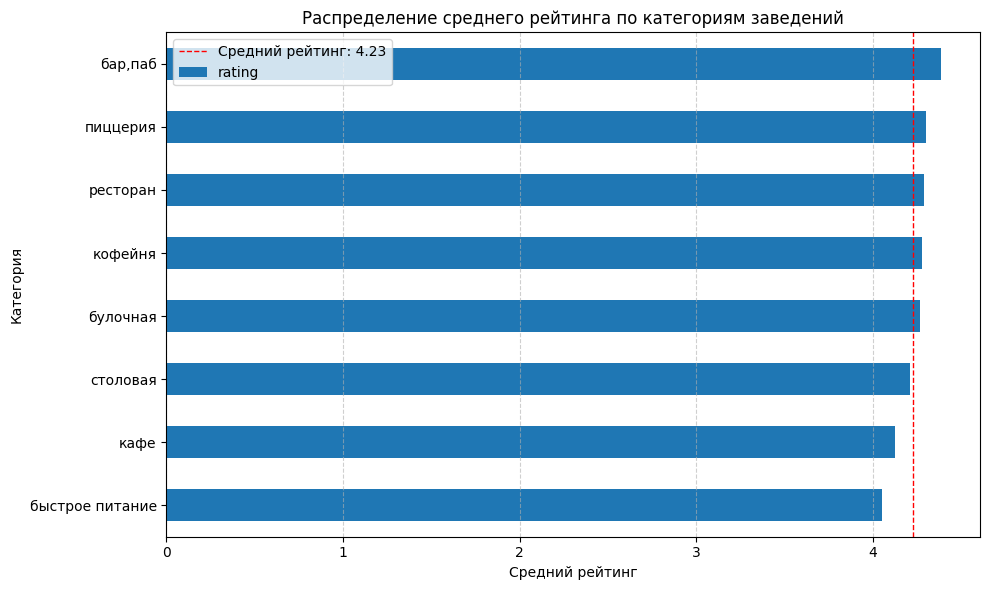

In [368]:
grouped.plot(kind='barh',
             title='Распределение среднего рейтинга по категориям заведений',
             legend=True,
             xlabel='Средний рейтинг',
             ylabel='Категория',
             figsize=(10, 6))

mean_rating = df['rating'].mean()

plt.axvline(mean_rating,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг: {round(mean_rating, 2)}')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Средние рейтинги по категориям отличаются незначительно: большинство значений находятся в диапазоне от 4 до 4.4.
Категории с более высоким рейтингом — это паб, пицерии и ресторан, что может говорить о высоком уровне сервисе, ведь в ресторане чаще всего хорошее обслуживание, пиццерии - преимущественно семейные заведения, а в пабах можно поговорить с барменом по душам.
Категории с чуть более низкими рейтингами — кофейни и булочные, где уровень ожиданий ниже.
В целом, различия в усреднённых рейтингах не критичны.

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постром и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберим самую сильную связь и проверьте её.

Рассчитаем матрицу корреляции `phi_k`. 

In [369]:
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.281392
district,0.200701
category,0.189904
is_24_7,0.150210
chain,0.108060
seats,0.000000


Наибольшая корреляция наблюдается с категориями цен (0.28), административным районом (0.2) и категориями заведений (0.19). Для остальных признаков коэффициент корреляции снижается с 0.15 до 0.

Визуализируем результат корреляции с помощью тепловой карты.

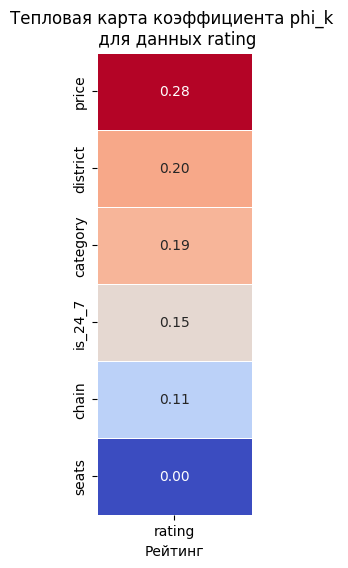

In [370]:
plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')

plt.show()

Самая сильная связь получается со столбцом price, проверим ее.

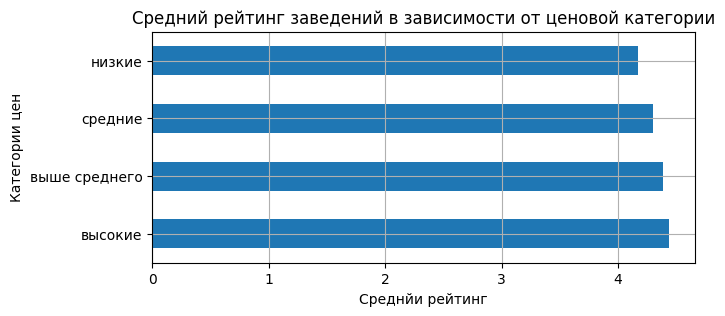

In [371]:
filtered_df = df[df['price'] != 'неизвестно']
plt.figure(figsize=(7, 3))

filtered_df.groupby('price')['rating'].mean().sort_values(ascending=False).plot(
               kind='barh',
               rot=0,
               legend=False,
               title=f'Средний рейтинг заведений в зависимости от ценовой категории'
)

plt.xlabel('Среднйи рейтинг')
plt.ylabel('Категории цен')
plt.grid()

plt.show()

График подтверждает, чем выше уровень заведения, тем выше рейтинг.

---

### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. Узнаем, к какой категории заведений они относятся.

In [372]:
top_15 = df[df['chain'] == 1].groupby(['name', 'category']).agg({'id': 'count', 'rating': 'mean'})
top_15 = top_15.rename(columns={'id': 'quantity'})
top_15 = top_15.sort_values(by='quantity', ascending=False).head(15)
top_15

,,quantity,rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114286
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


Можно заметить, что самые популярные заведения - это Шоколадница, додо пицца и домино'с пицца, однако рейтинг у них ниже среднего.
Визуализируем графики, чтоб можно было увидеть лидеров, посмотреть, каких категорий больше всего, сравнить средний рейтинг заведений.

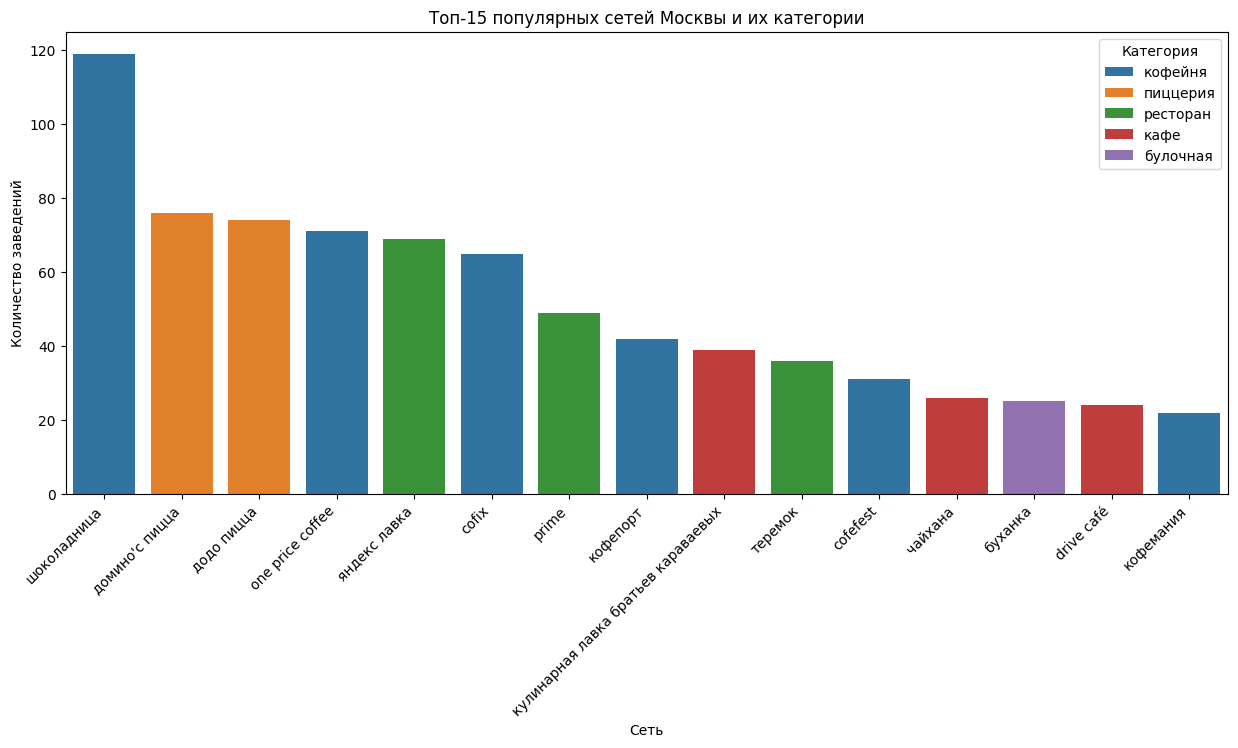

In [373]:

plt.figure(figsize=(15, 6))
sns.barplot(
    data=top_15,
    x='name',
    y='quantity',
    hue='category',
)

plt.title('Топ-15 популярных сетей Москвы и их категории')
plt.xlabel('Сеть')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория')
plt.show()

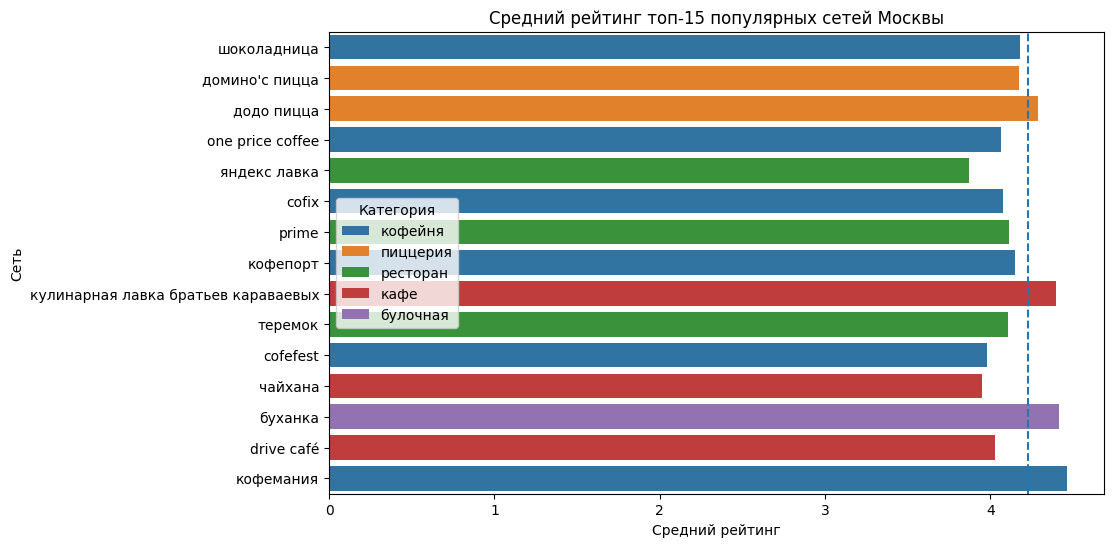

In [374]:
avg_rating = df['rating'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_15,
    y='name',
    x='rating',
    hue='category',
)

plt.axvline(avg_rating, linestyle='--')

plt.title('Средний рейтинг топ-15 популярных сетей Москвы')
plt.xlabel('Средний рейтинг')
plt.ylabel('Сеть')
plt.legend(title='Категория', loc='center left')

plt.show()

По результатам визуализаций можно сдаелать вывод, что лидеры по количеству точек — это кофейни и пиццерии:
Шоколадница – лидер среди всех кофеен.
Додо пицца и Домино’с пицца – пиццерии, почти такое же количество.

Основную долю занимают кофейни, рестораны и кафе на втором месте, однако стоит обратить внимание, что ресторанами так же считаются сети быстрого питания, Теремок, Prime. Меньшее количество заведений — у пиццерий и булочных.

Чёткий спад виден уже после 1 места, хотя у лидеров больше 119 точек, на втором месте у пиццерии уже 76, зато после первого месьп количесто точек идет на спад давольно равномерно.

Большинство сетей имеют рейтинг ниже среднего, несмотря на свою популярность. Удивительно, но лидеры, как Шоколадница, Домино’с пицца — все они ниже среднего. Лучший рейтинг у кофемании. Также хорошо себя показывают Кулинарная лавка братьев Караваевых, буханка и додо пицца — все они выше среднего. Популярность не означает высокий рейтинг — многие сети с большим числом точек оцениваются ниже среднего.

---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. 


In [375]:
grouped_data = df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False).reset_index()
print(grouped_data) 

                                  district  middle_avg_bill
0       Центральный административный округ      1191.057547
1          Западный административный округ      1053.225490
2          Северный административный округ       927.959627
3             Южный административный округ       834.398089
4   Северо-Западный административный округ       822.222930
5         Восточный административный округ       820.626923
6      Юго-Западный административный округ       792.561702
7  Северо-Восточный административный округ       716.611296
8     Юго-Восточный административный округ       654.097938


Можно заметить, что в ЦАО самые большие показатели среднего чека, на втором месте ЗАО.

Проанализируем цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? 
Найдем самое частое значение среднего чека (моду) для каждого административного округа, а так же минимальное и максимальное значение.

In [376]:
result = df.groupby('district')['middle_avg_bill'].agg([
    ('min_bill', 'min'),
    ('max_bill', 'max'),
    ('mode_bill', lambda x: x.mode().iat[0] if not x.mode().empty else None)
])
result

,min_bill,max_bill,mode_bill
district,,,
Восточный административный округ,50.0,10000.0,1250.0
Западный административный округ,50.0,5250.0,1250.0
Северный административный округ,130.0,11000.0,500.0
Северо-Восточный административный округ,50.0,4500.0,300.0
Северо-Западный административный округ,120.0,2900.0,1250.0
Центральный административный округ,0.0,7250.0,1250.0
Юго-Восточный административный округ,30.0,3750.0,300.0
Юго-Западный административный округ,100.0,2750.0,1250.0
Южный административный округ,100.0,35000.0,1250.0


Можно заметить, что самый маленький счет  в Юго-Восточныом административный округе - 30 рублей, однако в ЦАО стоит значение 0, скорее всего, чек был оплачен баллами, а самый большой в ЮАО, возможно там был банкет, самое частное значение - 1250, практически во всех округах. Значения получились неоднозначными.
Посмотрим как удалённость от центра влияет на цены в заведениях? Оставим только ЦАО, а остальные регионы заменим на "Остальные"

In [377]:
df['is_cao'] = df['district'].apply(lambda x: 'ЦАО' if 'Центральный' in x else 'Остальные')
avg_prices = df.groupby('is_cao')['middle_avg_bill'].agg(['count', 'mean', 'median'])
avg_prices


,count,mean,median
is_cao,,,
Остальные,2089,839.822882,600.0
ЦАО,1060,1191.057547,1000.0


Средний чек в ЦАО сильно выше. 
Разница в медиане практически в 2 раза. 
Высокая медиана и среднее указывает на преобладание более дорогих заведений. 
Вне ЦАО больше заведений, но они дешевле. 
Удаленность от центра явно влияет на цены.

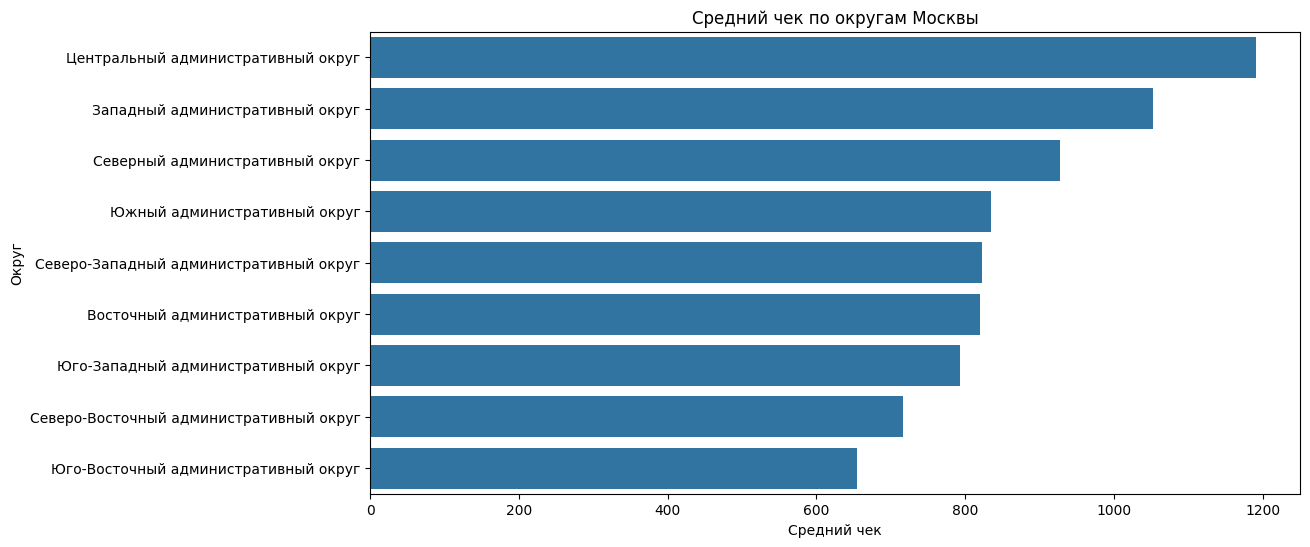

In [378]:
grouped = df.groupby('district')['middle_avg_bill'].agg(['mean', 'median']).sort_values(by='median', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=grouped_data, x='middle_avg_bill', y='district')
plt.title('Средний чек по округам Москвы')
plt.xlabel('Средний чек')
plt.ylabel('Округ')
plt.show()

Центральный административный округ — лидер по уровню цен, средний чек здесь самый высокий — практически 1 200р.
Это подтверждает, что центр Москвы остаётся самым дорогим районом для посещения заведений.
Западный (1053р) и Северный (928) округа также показывают относительно высокие средние чеки.
Самые доступные округа: Юго-Восточный и Северо-Восточный административные округа, их мредний чек ниже 654 ₽.
Это может быть связано с меньшим количеством премиальных заведений.

---

### Промежуточный вывод

Обобщим полученные результаты, выделим самые важные моменты.

В Москве больше всего заведений сосредоточено в Центральном административном округе (ЦАО).
В целом по городу преобладают рестораны и несетевые заведения — их большинство.
Доля сетевых точек составляет лишь 36%, среди которых чаще встречаются рестораны и кафе.
Большинство заведений имеют стабильно высокий рейтинг — выше 4, без значительных отклонений.
Наиболее популярные сети — «Шоколадница», «Додо Пицца» и «Домино’с Пицца», но их средний рейтинг большинства ниже общего уровня.
При этом в ЦАО средний чек значительно выше, чем в остальных округах.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируем итоговый вывод и рекомендации для заказчика. 
При составлении вывода придержимся такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

## Общий обзор проделанной работы.

В ходе исследования проанализировали данные 8406 заведений общественного  питания города Москвы. Датасет был проверен на пропуски, дубликаты и корректность типов данных. Анализ охватывал ключевые характеристики каждого объекта: название, район, а также категорию заведения, рейтинг пользователей, ценовой уровень, средний чек и количество посадочных мест. Отдельное внимание уделялось является ли заведение сетевым иди нет и особенностям, связанным с средним чеком и его зависимостью от административного округа.

Основной акцент был сделан на выявление зависимостей: распределение заведений по типам, различия между сетевыми и несетевыми точками, особенности ЦАО по сравнению с остальными округами, а также популярность и рейтинг наиболее распространённых сетей. Также была проведена оценка того, как удалённость от центра Москвы влияет на ценовую политику заведений.

### Ответы на исследовательские вопросы, или главные выводы.

Исследовательский анализ данных позволил ответить на вопросы:

- в данных представлено 8 категорий заведений: 'ресторан', 'кафе', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание',
 'столовая', 'булочная'. Наиболее распространённые заведения в Москве — кафе (2377), за ними следуют рестораны (2042) и кофейни (1413), что отражает высокий спрос на места с комфортной посадкой и разнообразным меню.
Бары, пабы (764) и пиццерии (633) также популярны, скорее всего для вечернего досуга и широкой аудитории.
Реже встречаются заведения быстрого питания (603), столовые (315) и особенно булочные (256) — они занимают более узкие ниши.

- В Москве присудствуют 9 административных районов: 'Северный административный округ', 'Северо-Восточный административный округ','Северо-Западный административный округ', 'Западный административный округ', 'Центральный административный округ', 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ' 'Юго-Западный административный округ'. ЦАО — лидер с большим отрывом: 2242 заведение, в основном это рестораны, кафе и кофейни. Скорее всего это связано с большим количеством офисов,наплывом туристов и культурной активностью в центре города. В других округах заведения распределены более равномерно, но с заметным снижением их количества по мере удаления от центра. Северо-Западный округ имеет наименьшее количество заведений (409), что может быть связано с маленьким населения или нежеланием предпринимателей открывать свои точки из-за низких зарплат жителей.

- Было выявлено, что в Москве только 38% заведений являются сетевыми. При этом чаще всего сетевые заведения - рестораны и кафе.

- было исследлвано количество мест в заведениях. Кофейни и рестораны (по 100) — самые вместительные заведения, рассчитанные на большой поток гостей. Бары и пабы вмещают около 60 человек, кафе, пиццерии и столовые — 40. Меньше всего посадочных мест в заведениях быстрого питания и булочной, что соответствует их формату.

- Разница между самым низким (4 — быстрое питание) и самым высоким рейтингом (4.4 — бар/паб) составляет примерно 0.4 балла по шкале до 5. Все категории имеют рейтинг выше 4, что говорит о том, что посетители довольны. Бары, рестораны, кофейни, пиццерии получают наиболее высокие оценки, возможно, благодаря качеству обслуживания и атмосфере. Кафе и быстрое питание — чуть ниже, но всё равно на хорошем уровне.

- Рейтинг заведения в большей степени зависит от ценовой категории и типа заведения. Это подчёркивает, что качество сервиса, атмосфера и ожидания клиентов важнее всего.

- Среди топ-15 популярных сетей в Москве преобладают кофейни (Шоколадница - 119 заведения, рейтинг - 4,18) и пиццерии (домино'с пицца 76 заведения, рейтинг - 4,17, додо пицца 74 заведения, рейтинг - 4,3), что отражает спрос на доступные и разнообразные форматы. Большое количество точек не всегда означает высокий рейтинг — более компактные сети вроде Кофемании(22 заведений, рейтинг - 4,5) или кулинарная лавка братьев караваевых(39 заведений, рейтинг - 4,4) показывают выше оценки. Это может говорить о разнице в уровне сервиса, уникальности предложений, разнообразии и постаянной обновляемости меню.

- Удалённость от центра Москвы напрямую влияет на ценовую политику заведений, чем ближе район к центру — тем выше и средний, и медианный чек. В ЦАО заведения в среднем дороже почти на 40%, чем в остальных округах. Это подчёркивает значительное неравенство в уровне цен по районам и различие в целевой аудитории.

### Рекомендации на основе анализа данных.

- Лучше открыватт рестораны, кофейни и кафе — они самые популярные среди посещений.

- Стоит развивать бары и пабы в центре — высокий спрос на вечерний отдых, особенно в ЦАО.

- Необходимо учитывать район — в ЦАО ориентироваться на премиум-сегмент, в других округах — на доступные цены.

- Стоит работать над уникальностью и сервисом в сетях — меньшее количество точек с высоким качеством часто приносит лучший рейтинг.

- Гибко формировать цены — выше в центре, ниже на окраинах для привлечения разных клиентов.

- Поддерживать высокий уровень качества — это важно для удержания клиентов и роста рейтинга.
